# Introduction
For our metric of the best neighborhood in Pittsburgh, we chose liveability.
We analyzed this metric using three submetrics: Best houses, Safety, and Park availability. 

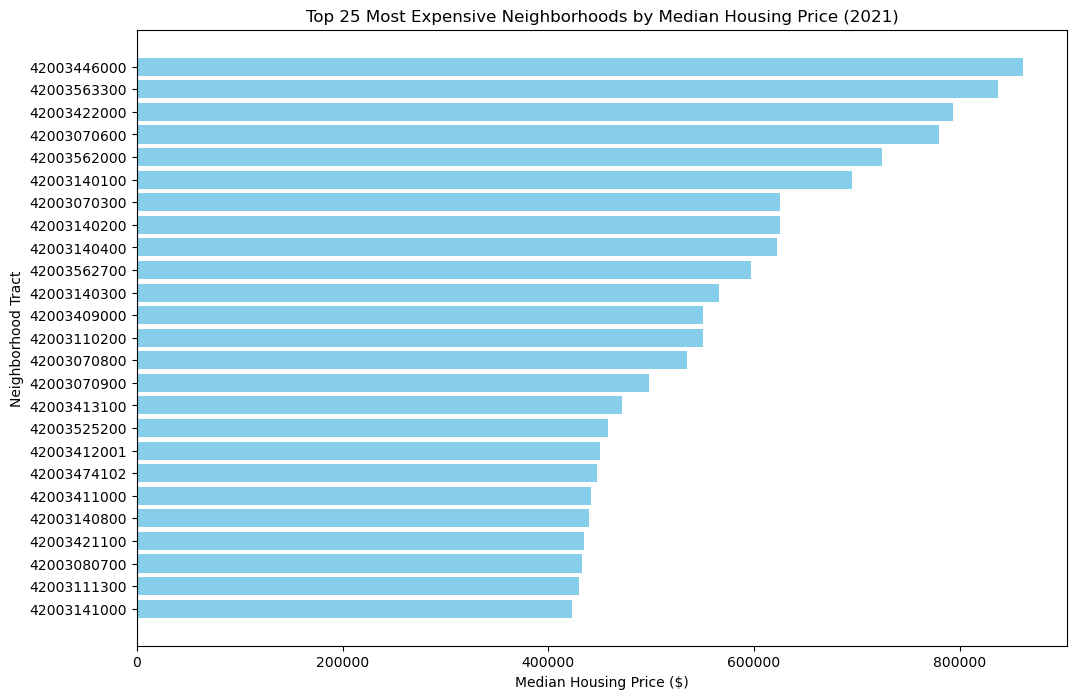

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset containing median housing prices by Census Tract
file_path = r"C:\Users\ramim\Downloads\48a84ba8-194c-47f9-a5c0-d4098a43151d.csv"
data = pd.read_csv(file_path)

# Filter the data to only get the tract numbers and the median housing prices
data_filtered = data[["Tract", "2021"]].copy()  
data_filtered.rename(columns={"Tract": "Neighborhood_Tract", "2021": "Median_Price_2021"}, inplace=True)

# Remove rows where median price data is missing or zero
# This ensures the analysis is accurate and doesn't include invalid data
data_filtered = data_filtered[(data_filtered["Median_Price_2021"] > 0)].dropna()

# Sort the data to identify the most expensive neighborhoods
# Sorting in descending order to bring the highest prices to the top
sorted_data = data_filtered.sort_values(by="Median_Price_2021", ascending=False)

# Select the top 25 most expensive neighborhoods from the sorted data
# This narrows the focus to the neighborhoods with the highest housing prices
top_10_expensive = sorted_data.head(25)

# Create a bar chart to visualize the top 25 most expensive neighborhoods
plt.figure(figsize=(12, 8))
plt.barh(
    top_10_expensive["Neighborhood_Tract"].astype(str),  
    top_10_expensive["Median_Price_2021"],              
    color='skyblue'                                     
)
plt.xlabel("Median Housing Price ($)")  
plt.ylabel("Neighborhood Tract")        # Formatting for the chart 
plt.title("Top 25 Most Expensive Neighborhoods by Median Housing Price (2021)")  
plt.gca().invert_yaxis()                
plt.show()                             


In [ ]:
1. 42003446000-edgeworth
2. 42003563300-sewickley heights
3. 42003422000-fox chapel
4. 42003070600-shadyside
5. 42003562000-north oakland
6. 42003140100-squirrel hill
7. 42003070300-shadyside
8. 42003140200-squirrel hill north
9. 42003140400-squirrel hill north
10. 42003562700-Allegheny West
11. 42003140300-squirrel hill
12. 42003409000-wexford
13. 42003110200-garfield
14. 42003070800-shadyside
15. 42003070900-shadyside
16. 42003413100-mccandless
17. 42003525200-oakmont
18. 42003412001-franklin park
19. 42003474102-St clair
20. 42003411000-wexford
21. 42003140800-squirrel hill south
22. 42003421100-fox chapel
23. 42003080700-friendship
24. 42003111300-east liberty
25. 42003141000- regent square

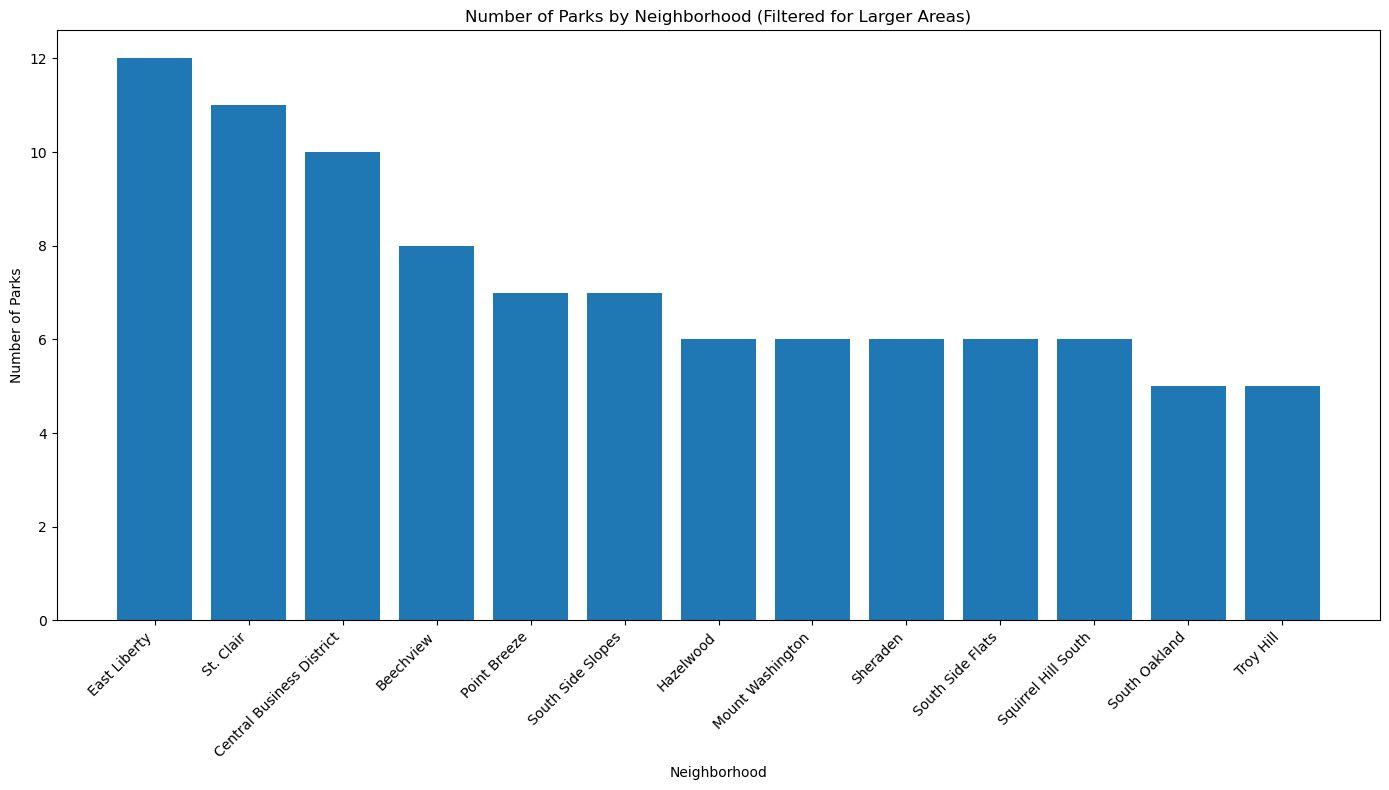

                 neighborhood  ParkCount
0                East Liberty         12
1                   St. Clair         11
2   Central Business District         10
3                   Beechview          8
4                Point Breeze          7
5           South Side Slopes          7
6                   Hazelwood          6
7            Mount Washington          6
8                    Sheraden          6
9            South Side Flats          6
10        Squirrel Hill South          6
11              South Oakland          5
12                  Troy Hill          5


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset containing parks information
parks_file_path = r"C:\Users\ramim\Downloads\fa329e3d-89ff-4708-8ddf-81bfedcad11d.csv"
parks_data = pd.read_csv(parks_file_path)

# Rank neighborhoods by the number of parks
neighborhood_park_ranking = parks_data.groupby('neighborhood').size().reset_index(name='ParkCount')

# Add "St. Clair" neighborhood with 11 parks
additional_data = pd.DataFrame({'neighborhood': ['St. Clair'], 'ParkCount': [11]}) # Counter
neighborhood_park_ranking = pd.concat([neighborhood_park_ranking, additional_data], ignore_index=True)

# Filter out smaller neighborhoods (e.g., fewer than 5 parks)
filtered_park_ranking = neighborhood_park_ranking[neighborhood_park_ranking['ParkCount'] >= 5]

# Sort the filtered dataset
filtered_park_ranking = filtered_park_ranking.sort_values(by='ParkCount', ascending=False).reset_index(drop=True)

# Create a graph for the filtered neighborhoods
plt.figure(figsize=(14, 8))
plt.bar(filtered_park_ranking['neighborhood'], filtered_park_ranking['ParkCount'])
plt.xlabel('Neighborhood')
plt.ylabel('Number of Parks')
plt.title('Number of Parks by Neighborhood (Filtered for Larger Areas)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display the filtered ranking
print(filtered_park_ranking)


Neighborhood with the least arrests in the last 3 years:
   INCIDENTNEIGHBORHOOD  Arrest_Count
54      Mt. Oliver Boro             1


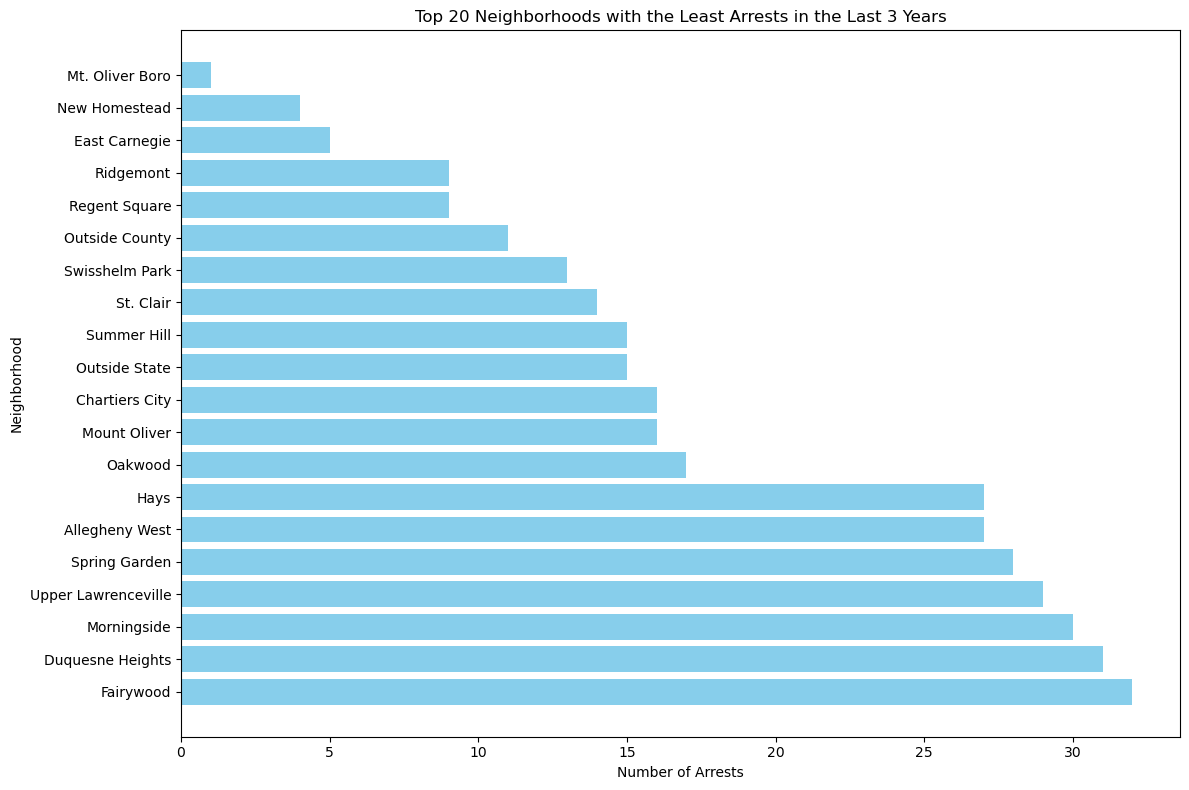

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#this loads the csv file into python
arrests_file_path = r"C:\Users\ramim\Downloads\e03a89dd-134a-4ee8-a2bd-62c40aeebc6f.csv"
arrests_data = pd.read_csv(arrests_file_path)

#converts arresttime column into datetime format for easier processing
arrests_data['ARRESTTIME'] = pd.to_datetime(arrests_data['ARRESTTIME'])

#time stamp (three years ago)
three_years_ago = pd.Timestamp.now() - pd.DateOffset(years=3)

#filter arrest for only the past three years so the data is recent
recent_arrests = arrests_data[arrests_data['ARRESTTIME'] >= three_years_ago]

#group the arrests by neighborhood
arrests_by_neighborhood = recent_arrests.groupby('INCIDENTNEIGHBORHOOD').size().reset_index(name='Arrest_Count')

#sort into ascending order
sorted_arrests = arrests_by_neighborhood.sort_values(by='Arrest_Count')

#finds the neighborhood with the least number of arrests
least_arrests_neighborhood = sorted_arrests.head(1)
print("Neighborhood with the least arrests in the last 3 years:")
print(least_arrests_neighborhood)

#creates the graph
plt.figure(figsize=(12, 8))
plt.barh(sorted_arrests["INCIDENTNEIGHBORHOOD"].head(20), sorted_arrests["Arrest_Count"].head(20), color='skyblue')
plt.xlabel("Number of Arrests")
plt.ylabel("Neighborhood")
plt.title("Top 20 Neighborhoods with the Least Arrests in the Last 3 Years")
plt.gca().invert_yaxis()  # Ensure the lowest count is at the top
plt.tight_layout()
plt.show()

# St. Clair: The Best Neighborhood

When determining the "best" neighborhood in Pittsburgh, we used three key sub-metrics:

Safety: Measured by the number of reported crimes.
Parks: Measured by the availability of park space or access to parks.
Best houses: Measured by the highest median housing price.

These sub-metrics all contribute to the overarching metric of livability. 

We found that St. Clair consistently ranked at the top of our lists for all of our sub-metrics.
For "Best Houses" it ranked #19
For "Safety" it ranked #8
For "Parks" it ranked #2

Since it was able to rank highly for all of our sub-metrics, we were able to conclude that it is the most liveable 
